<a href="https://colab.research.google.com/github/jiho-kang/DL_CNN_Study/blob/main/02_fshion_mnist_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경설정

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Layer
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Keras fashion mnist dataset을 다운로드
* 5만개의 학습용, 1만개의 테스트용 grayscale image array를 다운로드

In [ ]:
# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# image size는 28x28의 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


**MNIST image array 시각화**

Text(0.5, 1.0, '9')

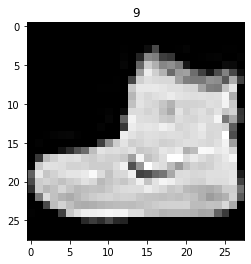

In [ ]:
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [ ]:
print(train_images.shape)
print(train_images[0, :, :].shape) # 위 신발에 대한 array

print()
print(train_images[0, :, :])
print('label:',train_labels[0])

(60000, 28, 28)
(28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0 

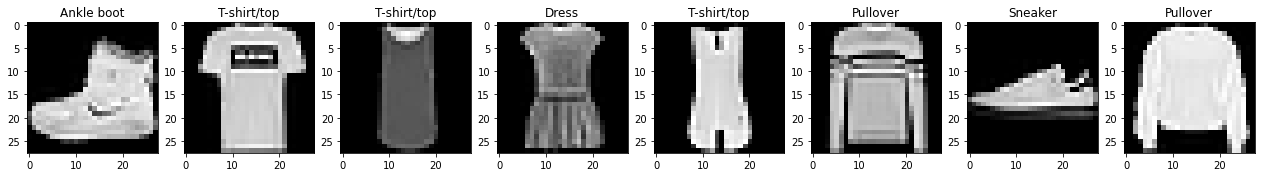

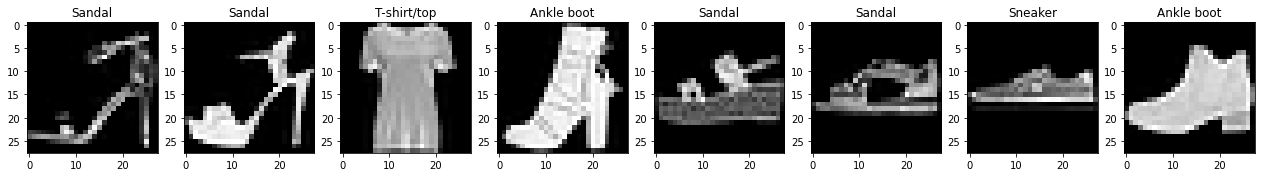

In [ ]:
%matplotlib inline 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols) # axs는 plot들이다.
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

# 데이터 전처리 수행. 
* 0 ~ 255 사이의 픽셀값을 0 ~ 1 사이 값으로 변환. 
* array type은 float 32

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images_preprocessed, train_labels_preprocessed = get_preprocessed_data(train_images, train_labels)
test_images_preprocessed, test_labels_preprocessed = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images_preprocessed.shape, train_labels_preprocessed.shape)
print("test dataset shape:", test_images_preprocessed.shape, test_labels_preprocessed.shape)


train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
train_images_preprocessed[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Sequential API
Dense Layer를 기반으로 모델을 생성

In [ ]:
INPUT_SIZE = 28 

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),# H*W = 28, 28
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


## 모델의 Loss와 Optimizer 설정하고 학습 수행
* loss는 categorical_crossentropy로, optimizer는 Adam으로 설정
* categorical crossentropy를 위해서 Lable을 OHE 로 변경

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

train_labels_categorical = to_categorical(train_labels_preprocessed)  
test_labels_categorical = to_categorical(test_labels_preprocessed)

print(train_labels_preprocessed.shape, train_labels_categorical.shape)

(60000,) (60000, 10)


In [ ]:
history = model.fit(x=train_images_preprocessed, y=train_labels_categorical, batch_size=6000, epochs=20, verbose=1)

Epoch 1/20
10/10 [==============================] - 2s 65ms/step - loss: 1.9258 - accuracy: 0.3793
Epoch 2/20
10/10 [==============================] - 1s 63ms/step - loss: 1.2127 - accuracy: 0.6603
Epoch 3/20
10/10 [==============================] - 1s 64ms/step - loss: 0.8356 - accuracy: 0.7368
Epoch 4/20
10/10 [==============================] - 1s 65ms/step - loss: 0.6730 - accuracy: 0.7789
Epoch 5/20
10/10 [==============================] - 1s 62ms/step - loss: 0.5936 - accuracy: 0.8035
Epoch 6/20
10/10 [==============================] - 1s 61ms/step - loss: 0.5456 - accuracy: 0.8199
Epoch 7/20
10/10 [==============================] - 1s 60ms/step - loss: 0.5145 - accuracy: 0.8282
Epoch 8/20
10/10 [==============================] - 1s 61ms/step - loss: 0.4922 - accuracy: 0.8335
Epoch 9/20
10/10 [==============================] - 1s 61ms/step - loss: 0.4753 - accuracy: 0.8389
Epoch 10/20
10/10 [==============================] - 1s 59ms/step - loss: 0.4625 - accuracy: 0.8429
Epoch 11/

In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])

[1.9257830381393433, 1.212712287902832, 0.8355503082275391, 0.6730321645736694, 0.5936217308044434, 0.5456368923187256, 0.5144825577735901, 0.4922165870666504, 0.4753410220146179, 0.462483286857605, 0.44902467727661133, 0.43794310092926025, 0.42787444591522217, 0.4216366410255432, 0.4138382375240326, 0.40525779128074646, 0.39778926968574524, 0.3920687735080719, 0.3871465027332306, 0.38375845551490784]
[0.3792833387851715, 0.6602500081062317, 0.7368000149726868, 0.7788833379745483, 0.8035333156585693, 0.8199499845504761, 0.828166663646698, 0.8335166573524475, 0.8389000296592712, 0.8428500294685364, 0.8474166393280029, 0.8501666784286499, 0.854366660118103, 0.8557999730110168, 0.85958331823349, 0.8600166440010071, 0.8640333414077759, 0.8658499717712402, 0.8663166761398315, 0.8671166896820068]


## 테스트 데이터를 기반으로 Label 값 예측 및 성능 검증

* model.predict()를 이용하여 label값 예측
* predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야함. 
* fit() 시 3차원(28x28 2차원 array가 여러개 존재) array 입력 했으므로 predict()도 동일한 3차원 데이터 입력
* 특히 한건만 predict() 할때도 3차원 데이터여야 함. 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [ ]:
test_images_preprocessed.shape

(10000, 28, 28)

In [ ]:
pred_proba = model.predict(test_images_preprocessed)
print(pred_proba.shape)
pred_proba[0]

(10000, 10)


array([6.5630025e-05, 9.5612722e-06, 1.0036639e-04, 2.5331263e-05,
       2.8664606e-05, 6.4964436e-02, 2.9865774e-05, 1.1638671e-01,
       3.3215969e-03, 8.1506783e-01], dtype=float32)

In [ ]:
np.expand_dims(test_images_preprocessed[0], axis=0).shape

(1, 28, 28)

In [ ]:
pred_proba = model.predict(np.expand_dims(test_images_preprocessed[0], axis=0))
print('softmax output:', pred_proba)

pred = np.squeeze(pred_proba)
print(pred.shape)
print('predicted class value:', np.argmax(pred))

pred = pred_proba
print(pred.shape)
print('predicted class value:', np.argmax(pred))

softmax output: [[6.5629938e-05 9.5612877e-06 1.0036627e-04 2.5331232e-05 2.8664599e-05
  6.4964540e-02 2.9865736e-05 1.1638682e-01 3.3215974e-03 8.1506759e-01]]
(10,)
predicted class value: 9
(1, 10)
predicted class value: 9


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0], 'predicted class value:', pred)

target class value: 9 predicted class value: [[6.5629938e-05 9.5612877e-06 1.0036627e-04 2.5331232e-05 2.8664599e-05
  6.4964540e-02 2.9865736e-05 1.1638682e-01 3.3215974e-03 8.1506759e-01]]


**테스트 데이터 세트로 모델 성능 검증**

In [ ]:
model.evaluate(test_images, test_labels_categorical, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 61.3089 - accuracy: 0.8404


[61.30891799926758, 0.840399980545044]

## 검증 데이터 세트를 이용하여 학습 수행. 
* 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
* fit()을 수행하면 iteration을 반복하기 때문에 중간에 하이퍼파라미터 변경(예: Learning Rate)등의 작업이 어려움. 
* fit() iteration시 여러 작업을 하기 위해 Callback 객체를 가짐. 
* 검증 데이터 세트를 fit() 시 적용하여 과적합이나 더이상 검증 데이터 성능이 좋아 지지 않을 때 Callback을 사용하여 Learning Rate 보정 작업등을 수행 가능

In [ ]:
import numpy as np 
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2022, shuffle=True)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=500, validation_data=(val_images, val_oh_labels), 
                    epochs=20, verbose=1)

Epoch 1/20
102/102 [==============================] - 2s 10ms/step - loss: 0.8058 - accuracy: 0.7351 - val_loss: 0.5141 - val_accuracy: 0.8249
Epoch 2/20
102/102 [==============================] - 1s 10ms/step - loss: 0.4802 - accuracy: 0.8347 - val_loss: 0.4434 - val_accuracy: 0.8494
Epoch 3/20
102/102 [==============================] - 1s 13ms/step - loss: 0.4298 - accuracy: 0.8505 - val_loss: 0.4223 - val_accuracy: 0.8556
Epoch 4/20
102/102 [==============================] - 2s 16ms/step - loss: 0.4022 - accuracy: 0.8588 - val_loss: 0.3879 - val_accuracy: 0.8651
Epoch 5/20
102/102 [==============================] - 2s 18ms/step - loss: 0.3766 - accuracy: 0.8696 - val_loss: 0.3987 - val_accuracy: 0.8617
Epoch 6/20
102/102 [==============================] - 2s 18ms/step - loss: 0.3670 - accuracy: 0.8705 - val_loss: 0.3660 - val_accuracy: 0.8734
Epoch 7/20
102/102 [==============================] - 1s 12ms/step - loss: 0.3492 - accuracy: 0.8782 - val_loss: 0.3562 - val_accuracy: 0.8726

In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.8057830929756165, 0.48020100593566895, 0.4297860860824585, 0.40220266580581665, 0.3765764534473419, 0.3670196831226349, 0.34917762875556946, 0.33777281641960144, 0.32817310094833374, 0.31622371077537537, 0.31189385056495667, 0.3014010488986969, 0.2981167137622833, 0.2860231101512909, 0.2861180305480957, 0.2814403474330902, 0.27632051706314087, 0.26455000042915344, 0.26107585430145264, 0.25608325004577637]
[0.7351176738739014, 0.8347451090812683, 0.8504902124404907, 0.8588431477546692, 0.8696274757385254, 0.8704705834388733, 0.878156840801239, 0.8799803853034973, 0.8837646842002869, 0.8867058753967285, 0.888568639755249, 0.8922156691551208, 0.8932548761367798, 0.8967254757881165, 0.8959804177284241, 0.897019624710083, 0.9001568555831909, 0.9040588140487671, 0.9059019684791565, 0.9071961045265198]
[0.5140532851219177, 0.4434312582015991, 0.42227134108543396, 0.38789820671081543, 0.3986626863479614, 0.36602625250816345, 0.3562152087688446, 0.35705775022506714, 0.3563397526741028, 0.347

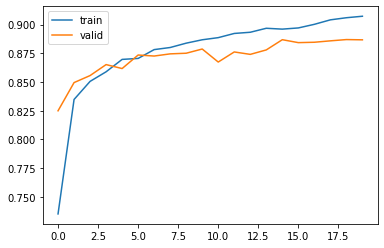

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

# Functional API
sequential은 쉽지만 실제 현업에서는 functional로 많이 사용된다.

In [ ]:
# Sequential Model을 이용하여 Keras 모델 생성 

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

# sequenctial api는 input layer가 별도로 없고, 인자로 input_shape을 줌으로써 인식시킨다.
# functional api는 input layer를 별도로 만들어줘야 함
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model1 = Sequential()
model1.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)        

In [ ]:
# Functional Api로 모델 만들기

from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

# sequenctial api는 input layer가 별도로 없고, 인자로 input_shape을 줌으로써 인식시킨다.
# functional api는 input layer를 별도로 만들어줘야 함
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 30)                3030      
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


## Custom한 Dense Layer 생성하기

In [ ]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):
    # CustomDense 객체 생성시 입력되는 초기화 parameter 처리
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )
        
    # CustomDense 객체에 callable로 입력된 입력 데이터 처리. 
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

# input 값을 4개의 원소를 가지는 1차원으로 생성. 
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
outputs = CustomDense(10)(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense (CustomDense)  (None, 10)                50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


**Functional API는 객체 생성 부분과 Callable 인자 입력 부분을 별도로 수행해도 무방**

In [ ]:
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
my_layer = CustomDense(10)
outputs = my_layer(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_1 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


**Sequential Model 생성은 단지 Functional API Layer들을 iteration 하면서 연결한 것을 model로 만든 것임**

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential([Input((4,)),
                   CustomDense(10),
                   CustomDense(8), 
                   tf.keras.layers.ReLU()])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_dense_2 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_3 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu (ReLU)                (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


### Sequential Model을 Functional 객체를 For loop 반복 호출하여 작성.

In [ ]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

for index, layer in enumerate(layers_list):
        print(index, layer)

0 KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
1 <__main__.CustomDense object at 0x7ff32d76e950>
2 <__main__.CustomDense object at 0x7ff32d7ab490>
3 <keras.layers.advanced_activations.ReLU object at 0x7ff32d75d250>


In [ ]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

inputs = None
callable_inputs = None
outputs = None
# layers_list에 있는 Functional 객체를 iteration 수행하면서 적용. 
for index, layer in enumerate(layers_list):
    # layers_list의 첫번째 인자는 Input 간주. 
    if index == 0:
        inputs = layer
        callable_inputs = layer
    # Functional 객체에 callable 인자로 callable_inputs를 입력하고 반환 결과 값을 다시 callable_inputs로 할당.     
    else: 
        callable_inputs = layer(callable_inputs)
    
outputs = callable_inputs
model = Model(inputs, outputs)
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_6 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_7 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu_2 (ReLU)              (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


## 앞에서 생성한 로직들을 함수화 
* Functional API로 모델 만들기
* pixel값 1 ~ 255를 0 ~ 1사이값 Float 32로 만들기
* One Hot Encoding Label에 적용하기
* 학습과 검증 데이터로 나누기.
* compile, 학습/예측/평가

In [ ]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    return model

model = create_model()
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_16 (Dense)            (None, 30)                3030      
                                                                 
 dense_17 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 30)                3030      
                                                                 
 dense_20 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습 수행. 
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=1000, epochs=20, validation_data=(val_images, val_oh_labels))


Epoch 1/20
51/51 [==============================] - 1s 17ms/step - loss: 1.0351 - accuracy: 0.6587 - val_loss: 0.6181 - val_accuracy: 0.7881
Epoch 2/20
51/51 [==============================] - 1s 14ms/step - loss: 0.5383 - accuracy: 0.8176 - val_loss: 0.5090 - val_accuracy: 0.8221
Epoch 3/20
51/51 [==============================] - 1s 14ms/step - loss: 0.4705 - accuracy: 0.8395 - val_loss: 0.4624 - val_accuracy: 0.8389
Epoch 4/20
51/51 [==============================] - 1s 13ms/step - loss: 0.4329 - accuracy: 0.8511 - val_loss: 0.4460 - val_accuracy: 0.8442
Epoch 5/20
51/51 [==============================] - 1s 14ms/step - loss: 0.4080 - accuracy: 0.8596 - val_loss: 0.4256 - val_accuracy: 0.8503
Epoch 6/20
51/51 [==============================] - 1s 14ms/step - loss: 0.3910 - accuracy: 0.8636 - val_loss: 0.4065 - val_accuracy: 0.8581
Epoch 7/20
51/51 [==============================] - 1s 14ms/step - loss: 0.3767 - accuracy: 0.8685 - val_loss: 0.3947 - val_accuracy: 0.8618
Epoch 8/20
51

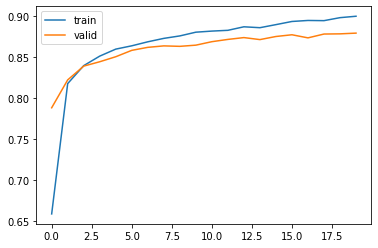

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [ ]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 4ms/step - loss: 0.3576 - accuracy: 0.8706


[0.35763296484947205, 0.8705999851226807]

# Callback 

## ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
* 특정 조건에 맞춰서 모델을 파일로 저장
* filepath: filepath는 (on_epoch_end에서 전달되는) epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음.
예를 들어 filepath가 weights.{epoch:02d}-{val_loss:.2f}.hdf5라면, 파일 이름에 세대 번호와 검증 손실을 넣어 모델의 체크포인트가 저장 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부
* save_weights_only: Weights만 저장할 지 여부 => 웬만하면 이거만 True하고 나중에 load weights 해주는게 나음
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추. 

In [ ]:
!pwd

/content


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/content/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=3, verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=1000, epochs=10, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb])

Epoch 1/10
51/51 [==============================] - 2s 28ms/step - loss: 1.0805 - accuracy: 0.6475 - val_loss: 0.6237 - val_accuracy: 0.7946
Epoch 2/10
51/51 [==============================] - 1s 21ms/step - loss: 0.5346 - accuracy: 0.8216 - val_loss: 0.4996 - val_accuracy: 0.8280
Epoch 3/10
48/51 [===========================>..] - ETA: 0s - loss: 0.4627 - accuracy: 0.8420
Epoch 00003: val_loss improved from inf to 0.45957, saving model to /content/weights.03-0.46.hdf5
51/51 [==============================] - 1s 22ms/step - loss: 0.4615 - accuracy: 0.8427 - val_loss: 0.4596 - val_accuracy: 0.8383
Epoch 4/10
51/51 [==============================] - 1s 22ms/step - loss: 0.4242 - accuracy: 0.8530 - val_loss: 0.4263 - val_accuracy: 0.8512
Epoch 5/10
51/51 [==============================] - 1s 20ms/step - loss: 0.3979 - accuracy: 0.8631 - val_loss: 0.4136 - val_accuracy: 0.8563
Epoch 6/10
49/51 [===========================>..] - ETA: 0s - loss: 0.3875 - accuracy: 0.8660
Epoch 00006: val_los

In [ ]:
!ls -lia
# !rm -rf weight*
# !ls -lia


total 1036
5505047 drwxr-xr-x 1 root root   4096 Feb 14 07:29 .
5374449 drwxr-xr-x 1 root root   4096 Feb 14 07:19 ..
6946832 drwxr-xr-x 4 root root   4096 Feb  1 14:31 .config
5505048 drwxr-xr-x 1 root root   4096 Feb  1 14:32 sample_data
5373981 -rw-r--r-- 1 root root 344272 Feb 14 07:29 weights.03-0.46.hdf5
5373982 -rw-r--r-- 1 root root 344272 Feb 14 07:29 weights.06-0.39.hdf5
5373983 -rw-r--r-- 1 root root 344272 Feb 14 07:29 weights.09-0.38.hdf5


## ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
* 특정 epochs 횟수동안 성능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* factor: 학습 속도를 줄일 인수. new_lr = lr * factor 
* patience: Learing Rate를 줄이기 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=1000, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr_cb])

Epoch 1/30
51/51 [==============================] - 1s 17ms/step - loss: 1.1521 - accuracy: 0.6167 - val_loss: 0.6727 - val_accuracy: 0.7776 - lr: 0.0010
Epoch 2/30
51/51 [==============================] - 1s 14ms/step - loss: 0.5628 - accuracy: 0.8127 - val_loss: 0.5183 - val_accuracy: 0.8238 - lr: 0.0010
Epoch 3/30
51/51 [==============================] - 1s 14ms/step - loss: 0.4750 - accuracy: 0.8384 - val_loss: 0.4678 - val_accuracy: 0.8362 - lr: 0.0010
Epoch 4/30
51/51 [==============================] - 1s 14ms/step - loss: 0.4414 - accuracy: 0.8486 - val_loss: 0.4423 - val_accuracy: 0.8427 - lr: 0.0010
Epoch 5/30
51/51 [==============================] - 1s 14ms/step - loss: 0.4083 - accuracy: 0.8590 - val_loss: 0.4250 - val_accuracy: 0.8458 - lr: 0.0010
Epoch 6/30
51/51 [==============================] - 1s 14ms/step - loss: 0.3888 - accuracy: 0.8653 - val_loss: 0.4111 - val_accuracy: 0.8540 - lr: 0.0010
Epoch 7/30
51/51 [==============================] - 1s 14ms/step - loss: 0.3

## EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
* 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* patience: Early Stopping 적용 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely_cb])

Epoch 1/30
399/399 [==============================] - 4s 7ms/step - loss: 0.6186 - accuracy: 0.7862 - val_loss: 0.4527 - val_accuracy: 0.8384
Epoch 2/30
399/399 [==============================] - 3s 6ms/step - loss: 0.4158 - accuracy: 0.8531 - val_loss: 0.4248 - val_accuracy: 0.8481
Epoch 3/30
399/399 [==============================] - 3s 7ms/step - loss: 0.3777 - accuracy: 0.8658 - val_loss: 0.3877 - val_accuracy: 0.8584
Epoch 4/30
399/399 [==============================] - 3s 7ms/step - loss: 0.3504 - accuracy: 0.8748 - val_loss: 0.3561 - val_accuracy: 0.8684
Epoch 5/30
399/399 [==============================] - 3s 6ms/step - loss: 0.3272 - accuracy: 0.8817 - val_loss: 0.3559 - val_accuracy: 0.8713
Epoch 6/30
399/399 [==============================] - 3s 7ms/step - loss: 0.3139 - accuracy: 0.8874 - val_loss: 0.3519 - val_accuracy: 0.8713
Epoch 7/30
399/399 [==============================] - 3s 7ms/step - loss: 0.3032 - accuracy: 0.8896 - val_loss: 0.3490 - val_accuracy: 0.8716
Epoch 

In [ ]:
!rm weigh*

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/content/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=500, epochs=40, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
102/102 [==============================] - 1s 10ms/step - loss: 0.8312 - accuracy: 0.7281 - val_loss: 0.5447 - val_accuracy: 0.8078 - lr: 0.0010
Epoch 2/40
102/102 [==============================] - 1s 9ms/step - loss: 0.4801 - accuracy: 0.8362 - val_loss: 0.4669 - val_accuracy: 0.8372 - lr: 0.0010
Epoch 3/40
102/102 [==============================] - 1s 9ms/step - loss: 0.4325 - accuracy: 0.8504 - val_loss: 0.4343 - val_accuracy: 0.8428 - lr: 0.0010
Epoch 4/40
102/102 [==============================] - 1s 9ms/step - loss: 0.4048 - accuracy: 0.8584 - val_loss: 0.4091 - val_accuracy: 0.8532 - lr: 0.0010
Epoch 5/40
102/102 [==============================] - 1s 9ms/step - loss: 0.3795 - accuracy: 0.8667 - val_loss: 0.3915 - val_accuracy: 0.8644 - lr: 0.0010
Epoch 6/40
102/102 [==============================] - 1s 9ms/step - loss: 0.3653 - accuracy: 0.8703 - val_loss: 0.3933 - val_accuracy: 0.8613 - lr: 0.0010
Epoch 7/40
102/102 [==============================] - 1s 9ms/step - l

In [ ]:
!ls -lia

total 6476
5505047 drwxr-xr-x 1 root root   4096 Feb 14 07:31 .
5374449 drwxr-xr-x 1 root root   4096 Feb 14 07:19 ..
6946832 drwxr-xr-x 4 root root   4096 Feb  1 14:31 .config
5505048 drwxr-xr-x 1 root root   4096 Feb  1 14:32 sample_data
5373981 -rw-r--r-- 1 root root 344272 Feb 14 07:30 weights.01-0.54.hdf5
5373982 -rw-r--r-- 1 root root 344272 Feb 14 07:30 weights.02-0.47.hdf5
5373983 -rw-r--r-- 1 root root 344272 Feb 14 07:30 weights.03-0.43.hdf5
5374456 -rw-r--r-- 1 root root 344272 Feb 14 07:30 weights.04-0.41.hdf5
5374457 -rw-r--r-- 1 root root 344272 Feb 14 07:30 weights.05-0.39.hdf5
5374458 -rw-r--r-- 1 root root 344272 Feb 14 07:30 weights.07-0.37.hdf5
5374459 -rw-r--r-- 1 root root 344272 Feb 14 07:30 weights.08-0.36.hdf5
5374460 -rw-r--r-- 1 root root 344272 Feb 14 07:30 weights.10-0.35.hdf5
5374461 -rw-r--r-- 1 root root 344272 Feb 14 07:30 weights.11-0.35.hdf5
5374462 -rw-r--r-- 1 root root 344272 Feb 14 07:30 weights.12-0.34.hdf5
5374463 -rw-r--r-- 1 root root 344272 Fe